- Redefine the model to be `w2 * t_u ** 2 + w1 * t_u + b` .
    - What parts of the training loop, and so on, need to change to accommodate this redefinition?
    - What parts are agnostic to swapping out the model?
    - Is the resulting loss higher or lower after training?
    - Is the actual result better or worse?

In [7]:
import torch
import torch.optim as optim

In [6]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = 0.1 * t_u

In [3]:
def model(t_u, w2, w1, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [4]:
# loss_fnは変わらない
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [8]:
# training loopは変わらないと思う
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [9]:
# paramsは増えた
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(n_epochs=5000,
             optimizer=optimizer,
             params=params,
             t_u=t_un,
             t_c=t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan], requires_grad=True)

In [12]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
# learning_rateを1e-3でもnan
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(n_epochs=5000,
             optimizer=optimizer,
             params=params,
             t_u=t_un,
             t_c=t_c)

Epoch 500, Loss 10.708596
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123478
Epoch 2500, Loss 5.377227
Epoch 3000, Loss 4.845286
Epoch 3500, Loss 4.465788
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


tensor([ 0.5570, -0.8881, -0.8753], requires_grad=True)

### visualizing (again)

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt

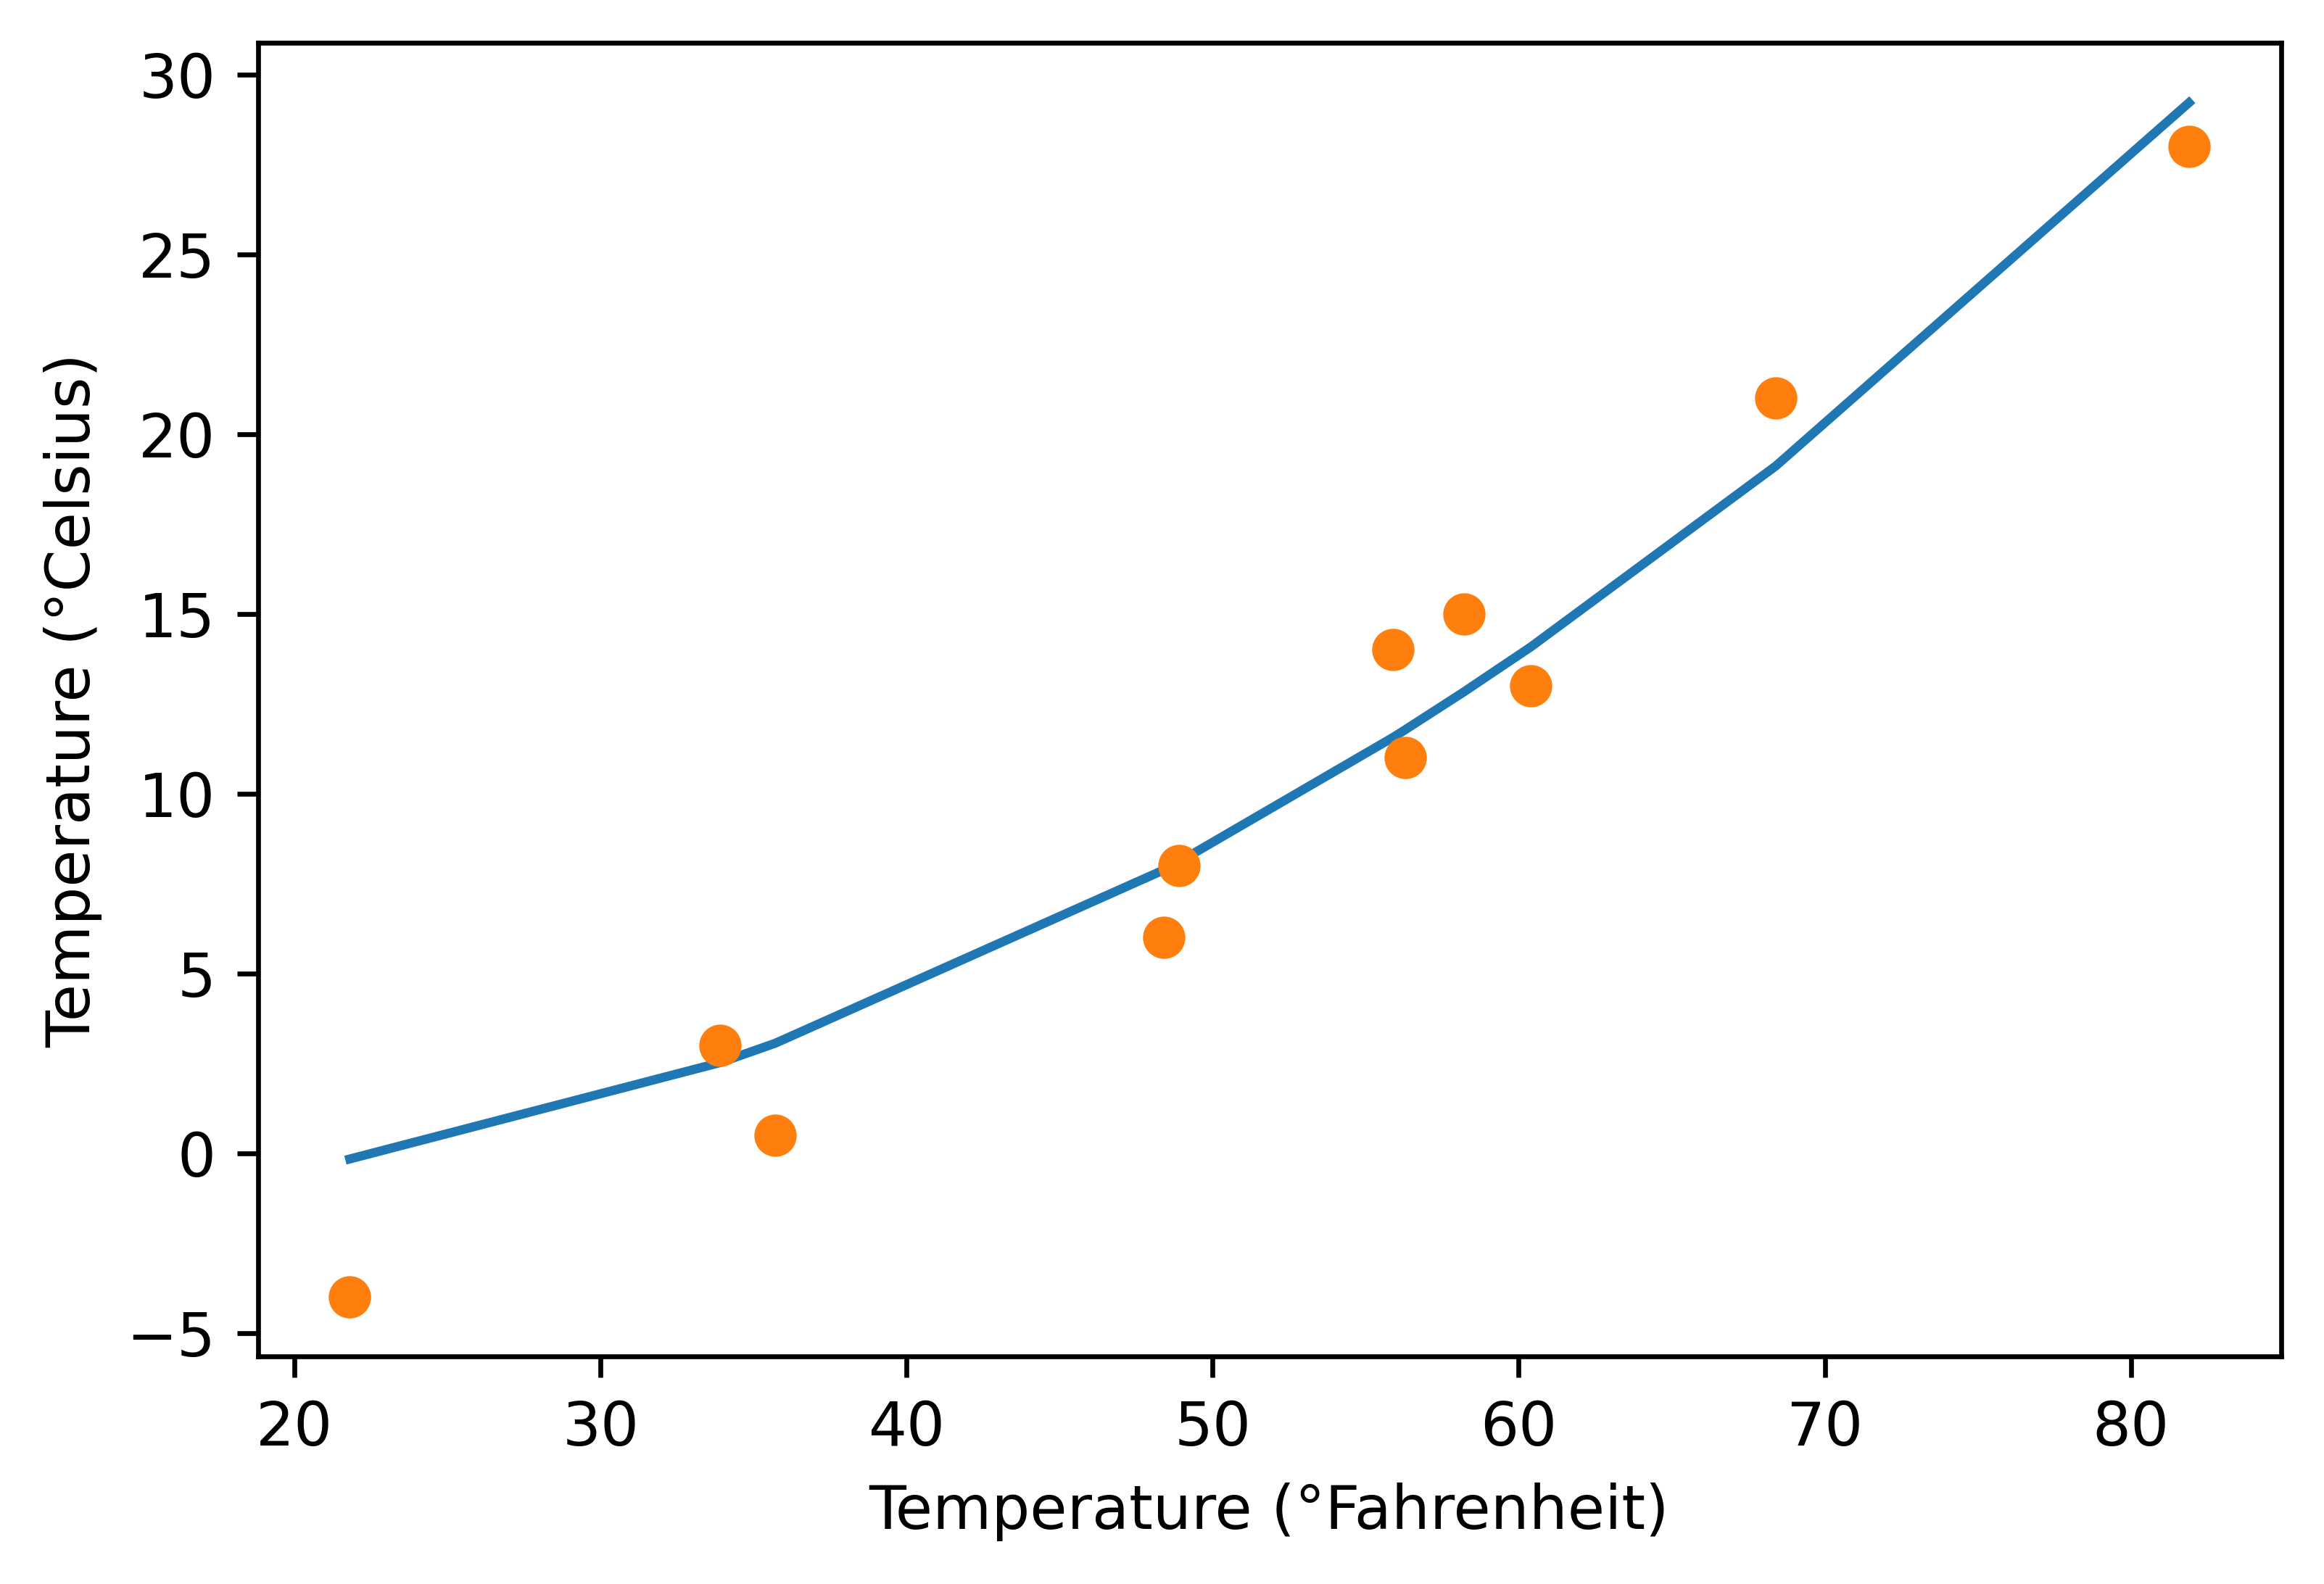

In [18]:
t_un_ordered, _ = torch.sort(t_un)
t_u_ordered, _ = torch.sort(t_u)
t_p = model(t_un_ordered, *params)

fig = plt.figure(dpi=600)
plt.xlabel('Temperature (°Fahrenheit)')
plt.ylabel('Temperature (°Celsius)')
plt.plot(t_u_ordered.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')